# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 18.11.2022

Мягий дедлайн: 23:59MSK 30.11.2022

Жестокий дедлайн: 23:59MSK 06.12.2022

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/43413/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

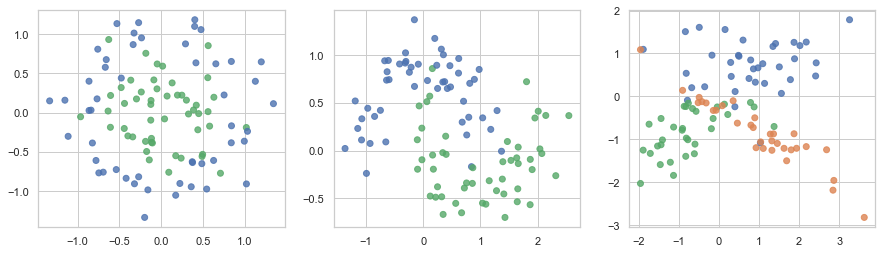

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    plt.show()

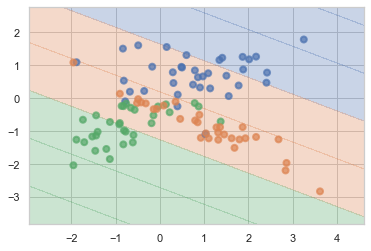

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
test_datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=17),
    make_moons(noise=0.2, random_state=17),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=21,
                        n_redundant=0., )
]

In [8]:
from sklearn.metrics import accuracy_score

def get_acc(clf, X, y_true, label='test', verbose=True):
    y_pred = clf.predict(X)
    score = accuracy_score(y_true, y_pred)
    if verbose:
        print(f'{label} acc:', score)
    return score

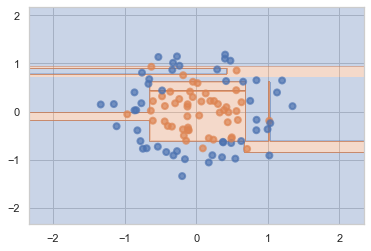

train acc: 1.0
test acc: 0.77


0.77

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X, y = datasets[0]
clf = DecisionTreeClassifier()
clf.fit(X, y)
plot_surface(clf, X, y)
get_acc(clf, *datasets[0], 'train')
get_acc(clf, *test_datasets[0], 'test')

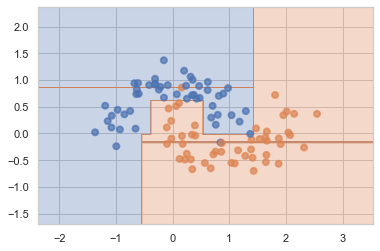

train acc: 1.0
test acc: 0.92


0.92

In [10]:
X, y = datasets[1]
clf = DecisionTreeClassifier()
clf.fit(X, y)
plot_surface(clf, X, y)
get_acc(clf, *datasets[1], 'train')
get_acc(clf, *test_datasets[1], 'test')

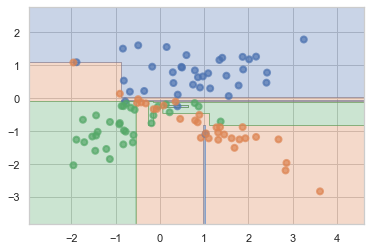

train acc: 1.0
test acc: 0.67


0.67

In [11]:
X, y = datasets[2]
clf = DecisionTreeClassifier()
clf.fit(X, y)
plot_surface(clf, X, y)
get_acc(clf, *datasets[2], 'train')
get_acc(clf, *test_datasets[2], 'test')

__Ответ:__ **деревья переобучились и на обучающей выборке дают точность 1.0. По графикам видно, что дерево сильно подогнано под обучающую выборку и там много тонких полос, которые нужны только чтобы предсказывать верный ответ для какого-то одного элемента выборки**

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

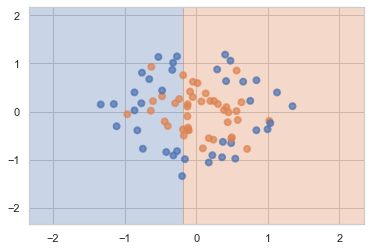

for params max_depth=1, min_samples_leaf=30: 
train acc: 0.625
val acc: 0.5
test acc: 0.55


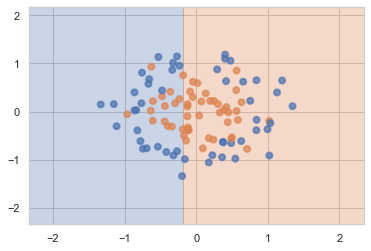

for params max_depth=1, min_samples_leaf=29: 
train acc: 0.6375
val acc: 0.5
test acc: 0.56
for params max_depth=1, min_samples_leaf=28: 
train acc: 0.65
val acc: 0.5
test acc: 0.56
for params max_depth=1, min_samples_leaf=27: 
train acc: 0.65
val acc: 0.5
test acc: 0.56
for params max_depth=1, min_samples_leaf=26: 
train acc: 0.65
val acc: 0.45
test acc: 0.54
for params max_depth=1, min_samples_leaf=25: 
train acc: 0.65
val acc: 0.45
test acc: 0.54
for params max_depth=1, min_samples_leaf=24: 
train acc: 0.65
val acc: 0.45
test acc: 0.54
for params max_depth=1, min_samples_leaf=23: 
train acc: 0.65
val acc: 0.45
test acc: 0.54
for params max_depth=1, min_samples_leaf=22: 
train acc: 0.65
val acc: 0.45
test acc: 0.54
for params max_depth=1, min_samples_leaf=21: 
train acc: 0.65
val acc: 0.45
test acc: 0.54
for params max_depth=1, min_samples_leaf=20: 
train acc: 0.65
val acc: 0.45
test acc: 0.54
for params max_depth=1, min_samples_leaf=19: 
train acc: 0.65
val acc: 0.45
test acc: 0.54


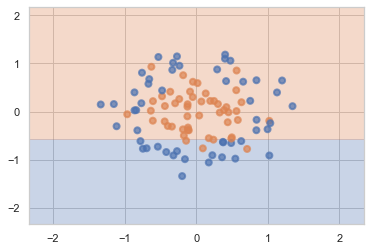

for params max_depth=1, min_samples_leaf=14: 
train acc: 0.65
val acc: 0.7
test acc: 0.6


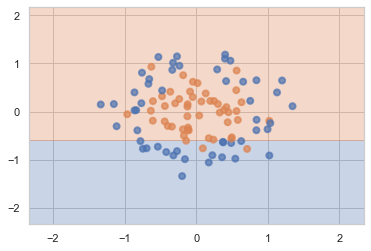

for params max_depth=1, min_samples_leaf=13: 
train acc: 0.65
val acc: 0.7
test acc: 0.6
for params max_depth=1, min_samples_leaf=12: 
train acc: 0.65
val acc: 0.7
test acc: 0.6
for params max_depth=1, min_samples_leaf=11: 
train acc: 0.65
val acc: 0.7
test acc: 0.6
for params max_depth=1, min_samples_leaf=10: 
train acc: 0.65
val acc: 0.7
test acc: 0.6
for params max_depth=1, min_samples_leaf=9: 
train acc: 0.6375
val acc: 0.45
test acc: 0.59
for params max_depth=1, min_samples_leaf=8: 
train acc: 0.6375
val acc: 0.45
test acc: 0.59
for params max_depth=1, min_samples_leaf=7: 
train acc: 0.6375
val acc: 0.45
test acc: 0.59
for params max_depth=1, min_samples_leaf=6: 
train acc: 0.6375
val acc: 0.45
test acc: 0.59
for params max_depth=1, min_samples_leaf=5: 
train acc: 0.6375
val acc: 0.45
test acc: 0.59
for params max_depth=1, min_samples_leaf=4: 
train acc: 0.6375
val acc: 0.45
test acc: 0.59
for params max_depth=1, min_samples_leaf=3: 
train acc: 0.6375
val acc: 0.45
test acc: 0.59


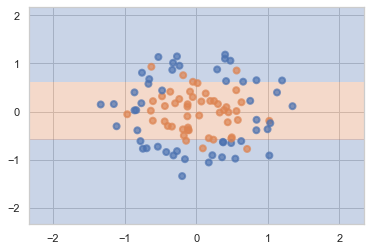

for params max_depth=2, min_samples_leaf=14: 
train acc: 0.7625
val acc: 0.85
test acc: 0.66


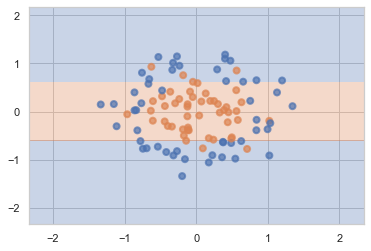

for params max_depth=2, min_samples_leaf=13: 
train acc: 0.7625
val acc: 0.85
test acc: 0.66
for params max_depth=2, min_samples_leaf=12: 
train acc: 0.7625
val acc: 0.85
test acc: 0.66
for params max_depth=2, min_samples_leaf=11: 
train acc: 0.7625
val acc: 0.85
test acc: 0.66
for params max_depth=2, min_samples_leaf=10: 
train acc: 0.7625
val acc: 0.85
test acc: 0.66
for params max_depth=2, min_samples_leaf=9: 
train acc: 0.75
val acc: 0.65
test acc: 0.7
for params max_depth=2, min_samples_leaf=8: 
train acc: 0.75
val acc: 0.65
test acc: 0.7
for params max_depth=2, min_samples_leaf=7: 
train acc: 0.75
val acc: 0.65
test acc: 0.7
for params max_depth=2, min_samples_leaf=6: 
train acc: 0.75
val acc: 0.65
test acc: 0.7
for params max_depth=2, min_samples_leaf=5: 
train acc: 0.75
val acc: 0.65
test acc: 0.7
for params max_depth=2, min_samples_leaf=4: 
train acc: 0.75
val acc: 0.65
test acc: 0.7
for params max_depth=2, min_samples_leaf=3: 
train acc: 0.75
val acc: 0.65
test acc: 0.7
for p

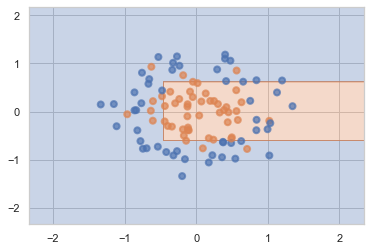

for params max_depth=3, min_samples_leaf=11: 
train acc: 0.8125
val acc: 0.9
test acc: 0.72
for params max_depth=3, min_samples_leaf=10: 
train acc: 0.8125
val acc: 0.9
test acc: 0.72
for params max_depth=3, min_samples_leaf=9: 
train acc: 0.8375
val acc: 0.8
test acc: 0.76
for params max_depth=3, min_samples_leaf=8: 
train acc: 0.8375
val acc: 0.8
test acc: 0.76
for params max_depth=3, min_samples_leaf=7: 
train acc: 0.8375
val acc: 0.8
test acc: 0.76
for params max_depth=3, min_samples_leaf=6: 
train acc: 0.8375
val acc: 0.8
test acc: 0.76
for params max_depth=3, min_samples_leaf=5: 
train acc: 0.8375
val acc: 0.8
test acc: 0.76
for params max_depth=3, min_samples_leaf=4: 
train acc: 0.8375
val acc: 0.8
test acc: 0.76
for params max_depth=3, min_samples_leaf=3: 
train acc: 0.8375
val acc: 0.8
test acc: 0.76
for params max_depth=3, min_samples_leaf=2: 
train acc: 0.8375
val acc: 0.8
test acc: 0.76
for params max_depth=4, min_samples_leaf=30: 
train acc: 0.625
val acc: 0.5
test acc: 0.

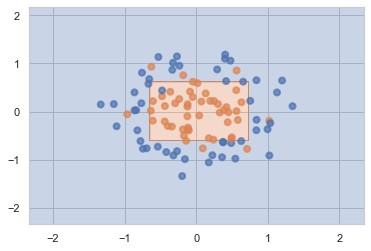

for params max_depth=5, min_samples_leaf=3: 
train acc: 0.9125
val acc: 0.95
test acc: 0.77
for params max_depth=5, min_samples_leaf=2: 
train acc: 0.9125
val acc: 0.95
test acc: 0.77
for params max_depth=6, min_samples_leaf=30: 
train acc: 0.625
val acc: 0.5
test acc: 0.55
for params max_depth=6, min_samples_leaf=29: 
train acc: 0.6375
val acc: 0.5
test acc: 0.56
for params max_depth=6, min_samples_leaf=28: 
train acc: 0.65
val acc: 0.5
test acc: 0.56
for params max_depth=6, min_samples_leaf=27: 
train acc: 0.65
val acc: 0.5
test acc: 0.56
for params max_depth=6, min_samples_leaf=26: 
train acc: 0.6875
val acc: 0.7
test acc: 0.59
for params max_depth=6, min_samples_leaf=25: 
train acc: 0.6875
val acc: 0.65
test acc: 0.57
for params max_depth=6, min_samples_leaf=24: 
train acc: 0.6875
val acc: 0.65
test acc: 0.57
for params max_depth=6, min_samples_leaf=23: 
train acc: 0.6875
val acc: 0.65
test acc: 0.57
for params max_depth=6, min_samples_leaf=22: 
train acc: 0.6875
val acc: 0.65
test

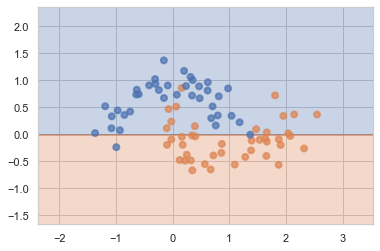

for params max_depth=1, min_samples_leaf=30: 
train acc: 0.825
val acc: 0.85
test acc: 0.82


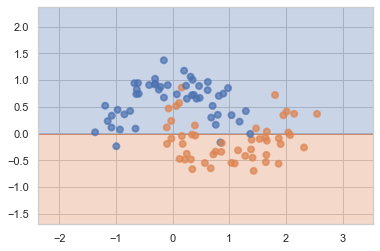

for params max_depth=1, min_samples_leaf=29: 
train acc: 0.825
val acc: 0.85
test acc: 0.82
for params max_depth=1, min_samples_leaf=28: 
train acc: 0.825
val acc: 0.85
test acc: 0.82
for params max_depth=1, min_samples_leaf=27: 
train acc: 0.825
val acc: 0.85
test acc: 0.82
for params max_depth=1, min_samples_leaf=26: 
train acc: 0.825
val acc: 0.85
test acc: 0.82
for params max_depth=1, min_samples_leaf=25: 
train acc: 0.825
val acc: 0.85
test acc: 0.82
for params max_depth=1, min_samples_leaf=24: 
train acc: 0.825
val acc: 0.85
test acc: 0.82
for params max_depth=1, min_samples_leaf=23: 
train acc: 0.825
val acc: 0.85
test acc: 0.82
for params max_depth=1, min_samples_leaf=22: 
train acc: 0.825
val acc: 0.85
test acc: 0.82
for params max_depth=1, min_samples_leaf=21: 
train acc: 0.825
val acc: 0.85
test acc: 0.82
for params max_depth=1, min_samples_leaf=20: 
train acc: 0.825
val acc: 0.85
test acc: 0.82
for params max_depth=1, min_samples_leaf=19: 
train acc: 0.825
val acc: 0.85
tes

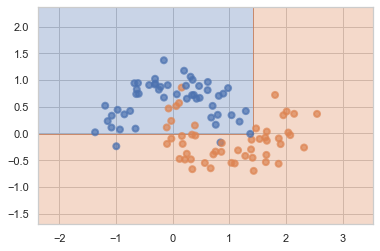

for params max_depth=2, min_samples_leaf=6: 
train acc: 0.9125
val acc: 0.9
test acc: 0.89
for params max_depth=2, min_samples_leaf=5: 
train acc: 0.9125
val acc: 0.9
test acc: 0.89
for params max_depth=2, min_samples_leaf=4: 
train acc: 0.9125
val acc: 0.9
test acc: 0.89
for params max_depth=2, min_samples_leaf=3: 
train acc: 0.9125
val acc: 0.9
test acc: 0.89
for params max_depth=2, min_samples_leaf=2: 
train acc: 0.9125
val acc: 0.9
test acc: 0.89
for params max_depth=3, min_samples_leaf=30: 
train acc: 0.825
val acc: 0.85
test acc: 0.82
for params max_depth=3, min_samples_leaf=29: 
train acc: 0.825
val acc: 0.85
test acc: 0.82
for params max_depth=3, min_samples_leaf=28: 
train acc: 0.825
val acc: 0.85
test acc: 0.82
for params max_depth=3, min_samples_leaf=27: 
train acc: 0.825
val acc: 0.85
test acc: 0.82
for params max_depth=3, min_samples_leaf=26: 
train acc: 0.825
val acc: 0.85
test acc: 0.82
for params max_depth=3, min_samples_leaf=25: 
train acc: 0.825
val acc: 0.85
test acc

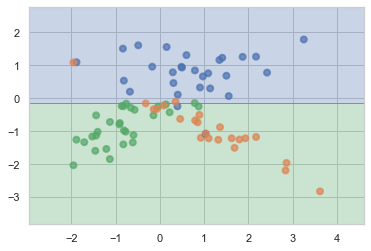

for params max_depth=1, min_samples_leaf=30: 
train acc: 0.675
val acc: 0.55
test acc: 0.53


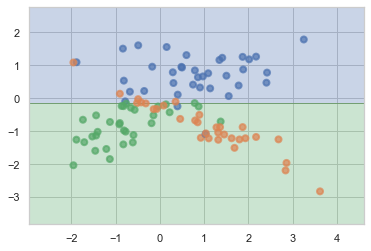

for params max_depth=1, min_samples_leaf=29: 
train acc: 0.675
val acc: 0.55
test acc: 0.53
for params max_depth=1, min_samples_leaf=28: 
train acc: 0.6875
val acc: 0.55
test acc: 0.54
for params max_depth=1, min_samples_leaf=27: 
train acc: 0.6875
val acc: 0.5
test acc: 0.55
for params max_depth=1, min_samples_leaf=26: 
train acc: 0.6875
val acc: 0.5
test acc: 0.55
for params max_depth=1, min_samples_leaf=25: 
train acc: 0.6875
val acc: 0.5
test acc: 0.55
for params max_depth=1, min_samples_leaf=24: 
train acc: 0.6875
val acc: 0.5
test acc: 0.55
for params max_depth=1, min_samples_leaf=23: 
train acc: 0.6875
val acc: 0.5
test acc: 0.55
for params max_depth=1, min_samples_leaf=22: 
train acc: 0.6875
val acc: 0.5
test acc: 0.55
for params max_depth=1, min_samples_leaf=21: 
train acc: 0.6875
val acc: 0.5
test acc: 0.55
for params max_depth=1, min_samples_leaf=20: 
train acc: 0.6875
val acc: 0.5
test acc: 0.55
for params max_depth=1, min_samples_leaf=19: 
train acc: 0.6875
val acc: 0.5
te

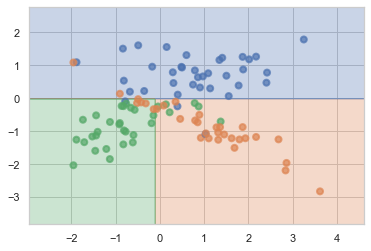

for params max_depth=2, min_samples_leaf=25: 
train acc: 0.8875
val acc: 0.7
test acc: 0.73
for params max_depth=2, min_samples_leaf=24: 
train acc: 0.8875
val acc: 0.7
test acc: 0.73
for params max_depth=2, min_samples_leaf=23: 
train acc: 0.8875
val acc: 0.7
test acc: 0.72
for params max_depth=2, min_samples_leaf=22: 
train acc: 0.8875
val acc: 0.7
test acc: 0.72
for params max_depth=2, min_samples_leaf=21: 
train acc: 0.8875
val acc: 0.7
test acc: 0.72
for params max_depth=2, min_samples_leaf=20: 
train acc: 0.8875
val acc: 0.7
test acc: 0.72
for params max_depth=2, min_samples_leaf=19: 
train acc: 0.8875
val acc: 0.7
test acc: 0.72
for params max_depth=2, min_samples_leaf=18: 
train acc: 0.8875
val acc: 0.7
test acc: 0.72
for params max_depth=2, min_samples_leaf=17: 
train acc: 0.8875
val acc: 0.7
test acc: 0.72
for params max_depth=2, min_samples_leaf=16: 
train acc: 0.8875
val acc: 0.7
test acc: 0.72
for params max_depth=2, min_samples_leaf=15: 
train acc: 0.8875
val acc: 0.7
tes

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
gridsearch_df = {}
for i in range(3):
    best_params = {
        'max_depth': 0,
        'min_samples_leaf': 0,
        'test_accuracy': 0,
        'val_accuracy': 0,
        'train_accuracy': 0
    }
    X, y = datasets[i]
    X_train, X_val = X[20:], X[:20]
    y_train, y_val = y[20:], y[:20]
    flag = True
    for max_depth in np.arange(1, 7):
        for min_samples_leaf in np.arange(30, 1, -1):
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            clf.fit(X_train, y_train)
            if flag:
                plot_surface(clf, X_train, y_train)
                flag = False
            print(f'for params max_depth={max_depth}, min_samples_leaf={min_samples_leaf}: ')
            train_acc = get_acc(clf, X_train, y_train, 'train')
            val_acc = get_acc(clf, X_val, y_val, 'val')
            test_acc = get_acc(clf, *test_datasets[i], 'test')
            if val_acc > best_params['val_accuracy']:
                best_params['test_accuracy'] = test_acc
                best_params['train_accuracy'] = train_acc
                best_params['val_accuracy'] = val_acc
                best_params['max_depth'] = max_depth
                best_params['min_samples_leaf'] = min_samples_leaf
                plot_surface(clf, X, y)
    gridsearch_df[i + 1] = best_params

In [13]:
import pandas as pd
pd.DataFrame(gridsearch_df)

,1,2,3
max_depth,5.00,2.0000,2.000
min_samples_leaf,4.00,7.0000,26.000
test_accuracy,0.82,0.8900,0.710
val_accuracy,1.00,0.9000,0.700
train_accuracy,0.90,0.9125,0.875


__Ответ:__ **удалось повысить accuracy на 1 (с 0.74 до 0.82) и на 3 (с 0.67 до 0.71) датасетах. На втором она была и так достаточно высокая и после регуляризации немного снизилась (но выборка очень маленькая, поэтому после подбора гипер-параметров получили менее переобученное дерево, которое на других данных покажет лучшие результаты. Разделяющая плоскость меняется по-разному, во 2 датасете данные достаточно просто разделялись, в отличие от 1, поэтому там лучшее дерево нашлось почти сразу. В 3 датасете данные тоже достаточно легко кластеризовывались**

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [14]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import pandas as pd
import seaborn as sns
from hw5code import find_best_split

data = pd.read_csv('students.csv')

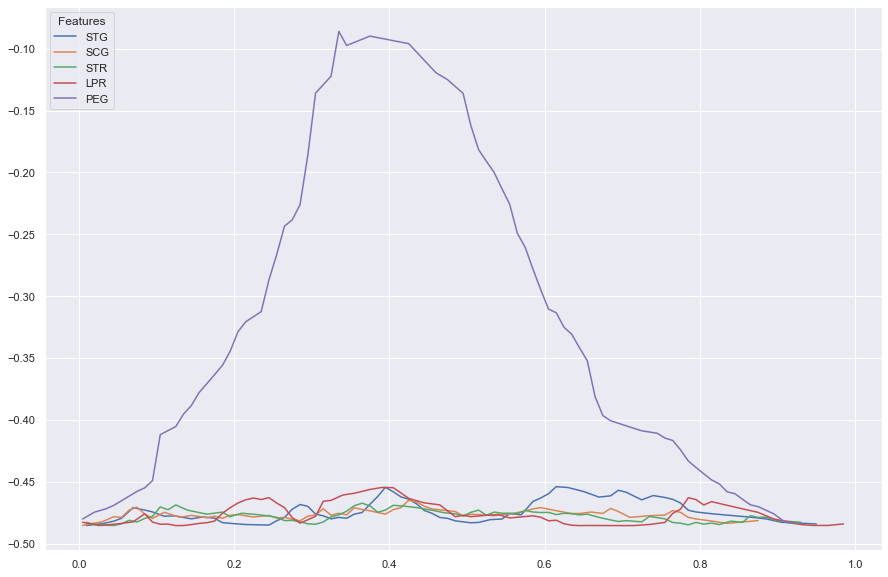

In [15]:
sns.set(rc={"figure.figsize":(15, 10)})
for col in data.columns[:-1]:
    thresholds, ginis, _, _ = find_best_split(np.array(data[col]), np.array(data['UNS']))
    sns.lineplot(x=thresholds, y=ginis)
    plt.legend(title='Features', loc='upper left', labels=data.columns[:-1])

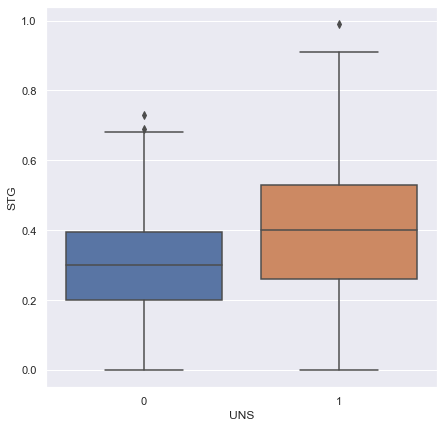

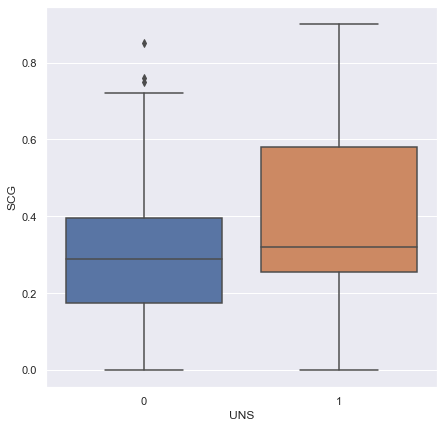

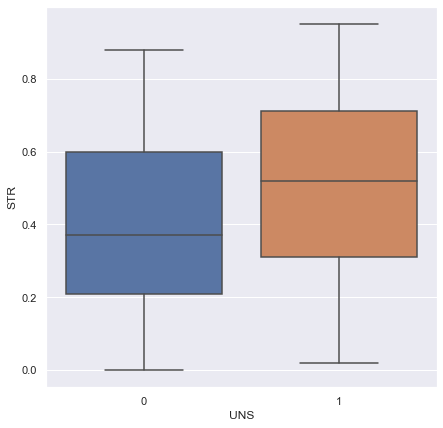

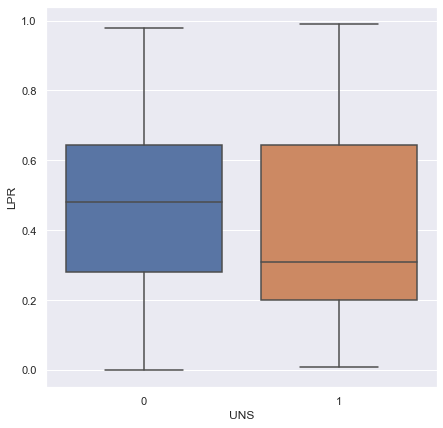

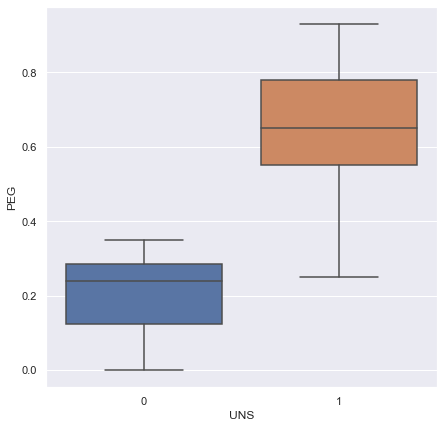

In [16]:
sns.set(rc={"figure.figsize":(7, 7)})
for col in data.columns[:-1]:
    sns.boxplot(x=data['UNS'], y=data[col])
    plt.show()

Нарисовал boxplot, так как он более информативный и в данном случае наглядный чем scatter

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Лучше всего делить выборку по признаку PEG, он дает самые лучшие показатели Джини при определенных порогах. На boxplot графиках это подтверждается: UNS очень сильно зависит от значений PEG, причем прям по графику видно, что ящик положительного класса находится сильно выше отрицательного и можно явно провести между ними разделение по признаку PEG.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

Ник: yar.aksen
1. https://contest.yandex.ru/contest/43413/run-report/77040700/
2. https://contest.yandex.ru/contest/43413/run-report/77387737/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [65]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')
mushrooms['p'] = (mushrooms['p'] == 'e').astype(np.uint8)

In [70]:
from sklearn.preprocessing import LabelEncoder
mushrooms = mushrooms.apply(LabelEncoder().fit_transform)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mushrooms.iloc[:, 1:], mushrooms.iloc[:, 0], test_size=0.5, random_state=42)

In [104]:
from sklearn.metrics import accuracy_score
from hw5code import DecisionTree

feature_types = ['categorical'] * X_train.shape[1]
clf = DecisionTree(feature_types)
clf.fit(np.array(X_train), np.array(y_train))
accuracy_score(np.array(y_test), clf.predict(np.array(X_test)))

1.0

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

<AxesSubplot:>

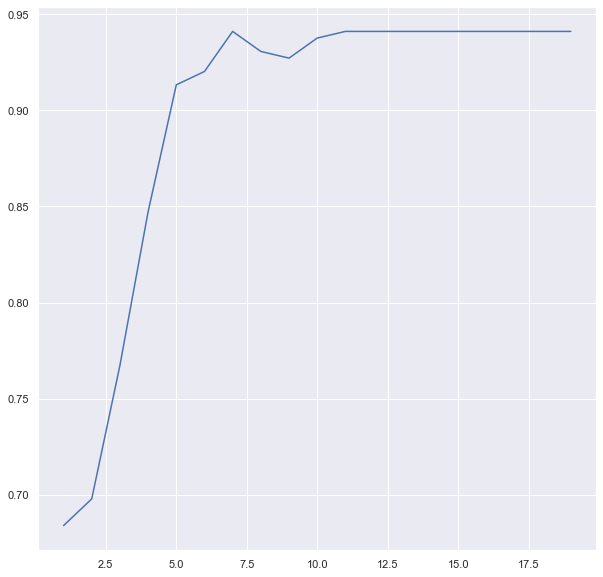

In [9]:
from hw5code import DecisionTree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

tictactoe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')
tictactoe['positive'] = (tictactoe['positive'] == 'positive').astype(np.uint8)

feature_types = ['categorical'] * (tictactoe.shape[1] - 1)

X_train, X_test, y_train, y_test = train_test_split(tictactoe.iloc[:, :-1], tictactoe.iloc[:, -1],
                                                    test_size=0.3, random_state=42)

max_depth_space = np.arange(1, 20)
max_depth_accs = []
for max_depth in max_depth_space:
    clf = DecisionTree(feature_types, max_depth=max_depth, min_samples_split=None)
    clf.fit(np.array(X_train), np.array(y_train))
    max_depth_accs.append(accuracy_score(np.array(y_test), clf.predict(np.array(X_test))))

sns.set(rc={"figure.figsize":(10, 10)})
sns.lineplot(x=max_depth_space, y=max_depth_accs)

<AxesSubplot:>

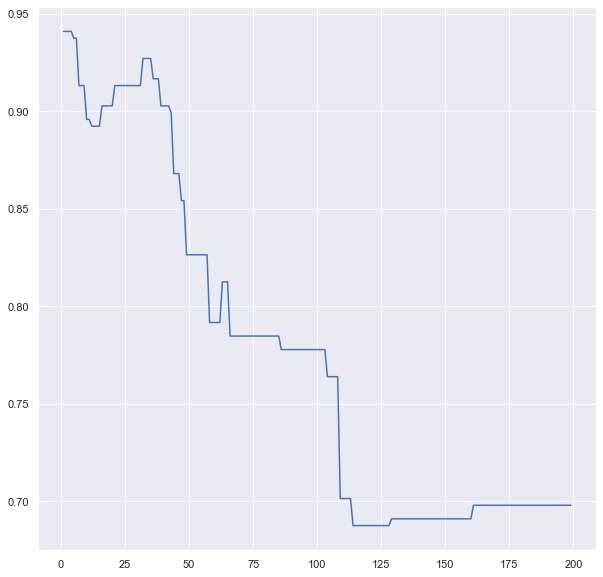

In [12]:
min_samples_split_space = np.arange(1, 200)
min_samples_split_accs = []
for min_samples_split in min_samples_split_space:
    clf = DecisionTree(feature_types, max_depth=None, min_samples_split=min_samples_split)
    clf.fit(np.array(X_train), np.array(y_train))
    min_samples_split_accs.append(accuracy_score(np.array(y_test), clf.predict(np.array(X_test))))

sns.set(rc={"figure.figsize":(10, 10)})
sns.lineplot(x=min_samples_split_space, y=min_samples_split_accs)

1. Видим, что увеличение глубины дерева приводит к улучшению качества. На каком то этапе модель начала немного переобучаться.
2. Если ставить слишком высокое значение для минимального количества элементов для деления, то дерево плохо обучается

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [207]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier

In [226]:
experiments_df = {}

**MUSHROOMS**

In [227]:
mushrooms_experiments = []

In [228]:
mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')
mushrooms['p'] = (mushrooms['p'] == 'e').astype(np.uint8)

mushrooms = mushrooms.apply(LabelEncoder().fit_transform)
feature_types = ['real'] * (mushrooms.shape[1] - 1)
X, y = np.array(mushrooms.iloc[:, 1:]), np.array(mushrooms.iloc[:, 0])
mushrooms_experiments.append(np.mean(cross_val_score(DecisionTree(feature_types), X, y,
                                  cv=10,
                                  scoring=make_scorer(accuracy_score))))

In [229]:
feature_types = ['categorical'] * (mushrooms.shape[1] - 1)
X, y = np.array(mushrooms.iloc[:, 1:]), np.array(mushrooms.iloc[:, 0])
mushrooms_experiments.append(np.mean(cross_val_score(DecisionTree(feature_types), X, y,
                                                     cv=10,
                                                     scoring=make_scorer(accuracy_score))))

In [230]:
mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')
mushrooms['p'] = (mushrooms['p'] == 'e').astype(np.uint8)

categorical = list(mushrooms.columns)[1:]

X, y = mushrooms.iloc[:, 1:], mushrooms.iloc[:, 0]
X = X.apply(LabelEncoder().fit_transform)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False), categorical)
], remainder='passthrough')

X = column_transformer.fit_transform(X)
feature_types = ['real'] * (X.shape[1])
mushrooms_experiments.append(np.mean(cross_val_score(DecisionTree(feature_types), np.array(X), np.array(y),
                                                     cv=10,
                                                     scoring=make_scorer(accuracy_score))))

In [231]:
mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')
mushrooms['p'] = (mushrooms['p'] == 'e').astype(np.uint8)

categorical = list(mushrooms.columns)[1:]
X, y = mushrooms.iloc[:, 1:], mushrooms.iloc[:, 0]
X = X.apply(LabelEncoder().fit_transform)

mushrooms_experiments.append(np.mean(cross_val_score(DecisionTreeClassifier(), X, y,
                                                     cv=10,
                                                     scoring=make_scorer(accuracy_score))))

In [232]:
experiments_df['mushrooms'] = mushrooms_experiments

**TIC-TAC-TOE**

In [233]:
tictactoe_experiments = []
tictactoe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')
tictactoe['positive'] = (tictactoe['positive'] == 'positive').astype(np.uint8)

tictactoe = tictactoe.apply(LabelEncoder().fit_transform)
feature_types = ['real'] * (tictactoe.shape[1] - 1)
X, y = np.array(tictactoe.iloc[:, :-1]), np.array(tictactoe.iloc[:, -1])
tictactoe_experiments.append(np.mean(cross_val_score(DecisionTree(feature_types), X, y,
                                                     cv=10,
                                                     scoring=make_scorer(accuracy_score))))

feature_types = ['categorical'] * (tictactoe.shape[1] - 1)
X, y = np.array(tictactoe.iloc[:, :-1]), np.array(tictactoe.iloc[:, -1])
tictactoe_experiments.append(np.mean(cross_val_score(DecisionTree(feature_types), X, y,
                                                     cv=10,
                                                     scoring=make_scorer(accuracy_score))))

tictactoe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')
tictactoe['positive'] = (tictactoe['positive'] == 'positive').astype(np.uint8)

categorical = list(tictactoe.columns)[:-1]

X, y = tictactoe.iloc[:, :-1], tictactoe.iloc[:, -1]
X = X.apply(LabelEncoder().fit_transform)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False), categorical)
], remainder='passthrough')

X = column_transformer.fit_transform(X)
feature_types = ['real'] * (X.shape[1])
tictactoe_experiments.append(np.mean(cross_val_score(DecisionTree(feature_types), np.array(X), np.array(y),
                                                     cv=10,
                                                     scoring=make_scorer(accuracy_score))))
tictactoe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')
tictactoe['positive'] = (tictactoe['positive'] == 'positive').astype(np.uint8)

X, y = tictactoe.iloc[:, :-1], tictactoe.iloc[:, -1]
X = X.apply(LabelEncoder().fit_transform)

tictactoe_experiments.append(np.mean(cross_val_score(DecisionTreeClassifier(), X, y,
                                                     cv=10,
                                                     scoring=make_scorer(accuracy_score))))

**CARS**

In [245]:
cars_experiments = []
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')
cars['unacc'] = ((cars['unacc'] != 'acc') & (cars['unacc'] != 'unacc')).astype(np.uint8)

cars = cars.apply(LabelEncoder().fit_transform)
feature_types = ['real'] * (cars.shape[1] - 1)
X, y = np.array(cars.iloc[:, :-1]), np.array(cars.iloc[:, -1])
cars_experiments.append(np.mean(cross_val_score(DecisionTree(feature_types), X, y,
                                                     cv=10,
                                                     scoring=make_scorer(accuracy_score))))

feature_types = ['categorical'] * (cars.shape[1] - 1)
X, y = np.array(cars.iloc[:, :-1]), np.array(cars.iloc[:, -1])
cars_experiments.append(np.mean(cross_val_score(DecisionTree(feature_types), X, y,
                                                     cv=10,
                                                     scoring=make_scorer(accuracy_score))))

cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')
cars['unacc'] = ((cars['unacc'] != 'acc') & (cars['unacc'] != 'unacc')).astype(np.uint8)

categorical = list(cars.columns)[:-1]

X, y = cars.iloc[:, :-1], cars.iloc[:, -1]
X = X.apply(LabelEncoder().fit_transform)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False), categorical)
], remainder='passthrough')

X = column_transformer.fit_transform(X)
feature_types = ['real'] * (X.shape[1])
cars_experiments.append(np.mean(cross_val_score(DecisionTree(feature_types), np.array(X), np.array(y),
                                                     cv=10,
                                                     scoring=make_scorer(accuracy_score))))
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')
cars['unacc'] = ((cars['unacc'] != 'acc') & (cars['unacc'] != 'unacc')).astype(np.uint8)

X, y = cars.iloc[:, :-1], cars.iloc[:, -1]
X = X.apply(LabelEncoder().fit_transform)

cars_experiments.append(np.mean(cross_val_score(DecisionTreeClassifier(), X, y,
                                                     cv=10,
                                                     scoring=make_scorer(accuracy_score))))

**NURSERY**

In [235]:
nursery_experiments = []
nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')
nursery['recommend'] = ((nursery['recommend'] != 'not_recom') & (nursery['recommend'] != 'recommend')).astype(np.uint8)

nursery = nursery.apply(LabelEncoder().fit_transform)
feature_types = ['real'] * (nursery.shape[1] - 1)
X, y = np.array(nursery.iloc[:, :-1]), np.array(nursery.iloc[:, -1])
nursery_experiments.append(np.mean(cross_val_score(DecisionTree(feature_types), X, y,
                                                cv=10,
                                                scoring=make_scorer(accuracy_score))))

feature_types = ['categorical'] * (nursery.shape[1] - 1)
X, y = np.array(nursery.iloc[:, :-1]), np.array(nursery.iloc[:, -1])
nursery_experiments.append(np.mean(cross_val_score(DecisionTree(feature_types), X, y,
                                                cv=10,
                                                scoring=make_scorer(accuracy_score))))

nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')
nursery['recommend'] = ((nursery['recommend'] != 'not_recom') & (nursery['recommend'] != 'recommend')).astype(np.uint8)

categorical = list(nursery.columns)[:-1]

X, y = nursery.iloc[:, :-1], nursery.iloc[:, -1]
X = X.apply(LabelEncoder().fit_transform)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False), categorical)
], remainder='passthrough')

X = column_transformer.fit_transform(X)
feature_types = ['real'] * (X.shape[1])
nursery_experiments.append(np.mean(cross_val_score(DecisionTree(feature_types), np.array(X), np.array(y),
                                                cv=10,
                                                scoring=make_scorer(accuracy_score))))
nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')
nursery['recommend'] = ((nursery['recommend'] != 'not_recom') & (nursery['recommend'] != 'recommend')).astype(np.uint8)

X, y = nursery.iloc[:, :-1], nursery.iloc[:, -1]
X = X.apply(LabelEncoder().fit_transform)

nursery_experiments.append(np.mean(cross_val_score(DecisionTreeClassifier(), X, y,
                                                cv=10,
                                                scoring=make_scorer(accuracy_score))))

**FINALS**

In [246]:
experiments_df['mushrooms'] = mushrooms_experiments
experiments_df['tic-tac-toe'] = tictactoe_experiments
experiments_df['cars'] = cars_experiments
experiments_df['nursery'] = nursery_experiments

In [247]:
pd.DataFrame.from_dict(experiments_df, orient='index', columns=['DT all real', 'DT all categ', 'DT all real + OHE', 'DTC sklearn'])

,DT all real,DT all categ,DT all real + OHE,DTC sklearn
mushrooms,0.999261,1.000000,0.999631,0.957551
tic-tac-toe,0.462697,0.549265,0.553520,0.762149
cars,0.942600,0.967519,0.921767,0.944952
nursery,0.999846,0.999923,0.999769,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

In [248]:
print('mushrooms feature quantity:', mushrooms.shape[1])
print('tictactoe feature quantity:', tictactoe.shape[1])
print('cars feature quantity:', cars.shape[1])
print('nursery feature quantity:', nursery.shape[1])

mushrooms feature quantity: 23
tictactoe feature quantity: 10
cars feature quantity: 7
nursery feature quantity: 9


In [260]:
print("Количество уникальных значений категориальных признаков по датасетам:")
print(mushrooms.nunique().sum())
print(tictactoe.nunique().sum())
print(cars.nunique().sum())
print(nursery.nunique().sum())

Количество уникальных значений категориальных признаков по датасетам:
119
29
23
29


**Ответ:**
1. Для всех наборов данных кроме tic-tac-toe самодельный алгоритм дает самую высокую accuracy (даже больше чем дерево решений из sklearn, который дает в среднем хороший результат, но ниже нашей реализации). На tic-tac-toe самое высокое качество получает алгоритм из sklearn. Среди самодельных алгоритмов худший результат показывают те, которые считают, что все признаки вещественные. В среднем по датасетам лучшее качество показывает самодельное дерево решений, считающее все признаки категориальными, в том числе то, которое используюет OneHotEncoding, выдает качество совсем немного хуже (а на tic-tac-toe даже лучше), чем DT all categ. В принципе это очевидно, так как признаки таковыми и являются: во всех датасетах отсутствуют числовые признаки (смотрел по описанию данных на сайте). Понятно, что считая какие-то категориальные признаки числовыми мы можем выделить какую-то несуществующую связь между классами, кодирующимися близкими числами, поэтому в таком случае качество становится хуже.
2. В результатах есть небольшая компонента случайности, так как при кросс-валидации мы делим выборку на фолды и при этом перемешиваем содержимое, так что, несмотря на детерменированность жадного алгоритма, от эксперимента к эксперименту может наблюдаться некоторое отклонение, которое можно уменьшать путем увеличения количества фолдов.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠿⠿⠿⠿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⠟⠋⠁⠀⠀⠀⠀⠀⠀⠀⠀⠉⠻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢺⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠆⠜⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⠿⠿⠛⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠻⣿⣿⣿⣿⣿
⣿⣿⡏⠁⠀⠀⠀⠀⠀⣀⣠⣤⣤⣶⣶⣶⣶⣶⣦⣤⡄⠀⠀⠀⠀⢀⣴⣿⣿⣿⣿⣿
⣿⣿⣷⣄⠀⠀⠀⢠⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢿⡧⠇⢀⣤⣶⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣾⣮⣭⣿⡻⣽⣒⠀⣤⣜⣭⠐⢐⣒⠢⢰⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣏⣿⣿⣿⣿⣿⣿⡟⣾⣿⠂⢈⢿⣷⣞⣸⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣽⣿⣿⣷⣶⣾⡿⠿⣿⠗⠈⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠻⠋⠉⠑⠀⠀⢘⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⡿⠟⢹⣿⣿⡇⢀⣶⣶⠴⠶⠀⠀⢽⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⡿⠀⠀⢸⣿⣿⠀⠀⠣⠀⠀⠀⠀⠀⡟⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⡿⠟⠋⠀⠀⠀⠀⠹⣿⣧⣀⠀⠀⠀⠀⡀⣴⠁⢘⡙⢿⣿⣿⣿⣿⣿⣿⣿⣿
⠉⠉⠁⠀⠀⠀⠀⠀⠀⠀⠀⠈⠙⢿⠗⠂⠄⠀⣴⡟⠀⠀⡃⠀⠉⠉⠟⡿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢷⠾⠛⠂⢹⠀⠀⠀⢡⠀⠀⠀⠀⠀⠙⠛⠿⢿